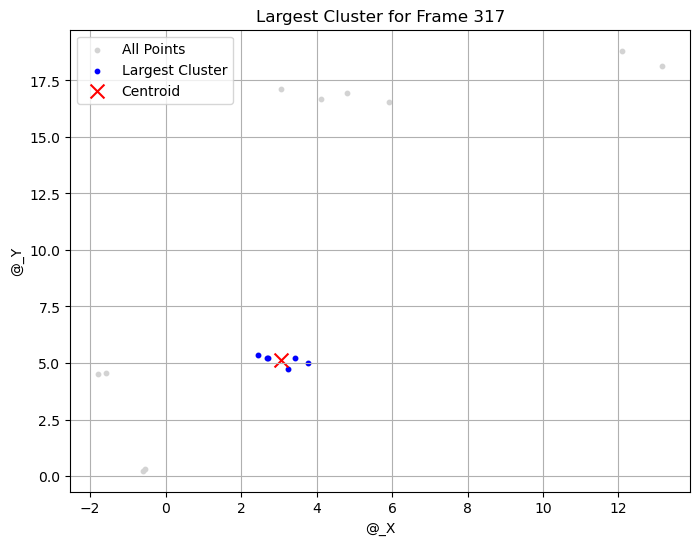

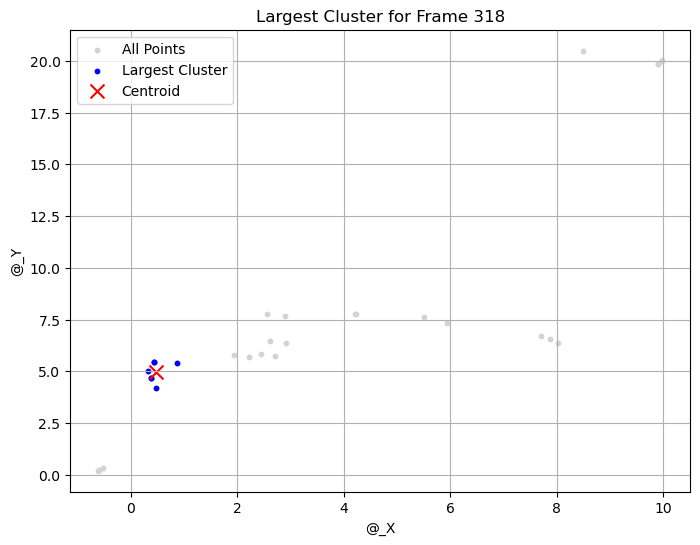

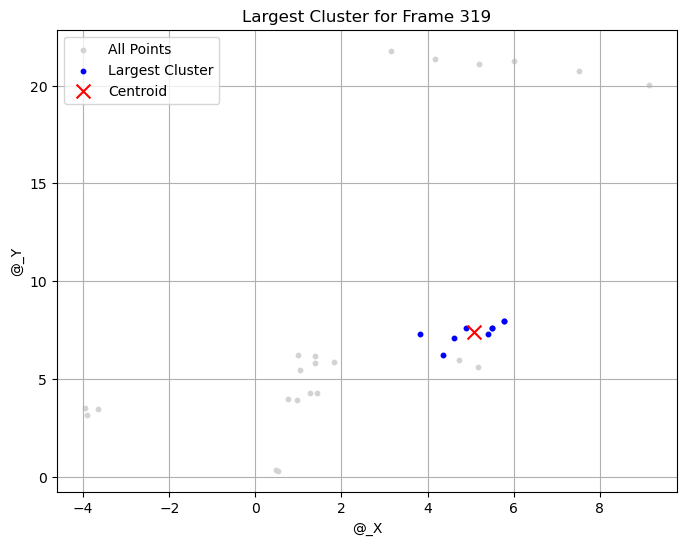

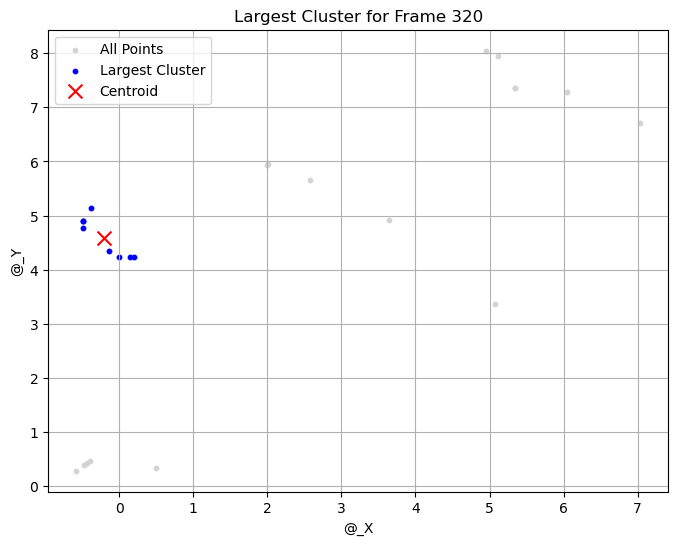

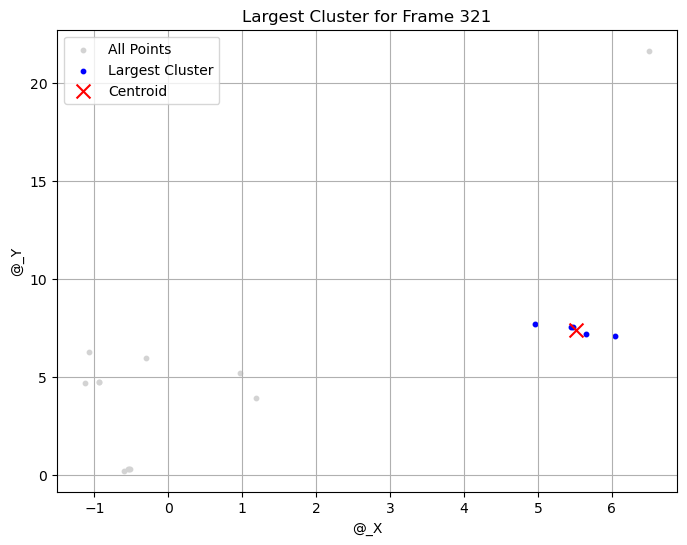

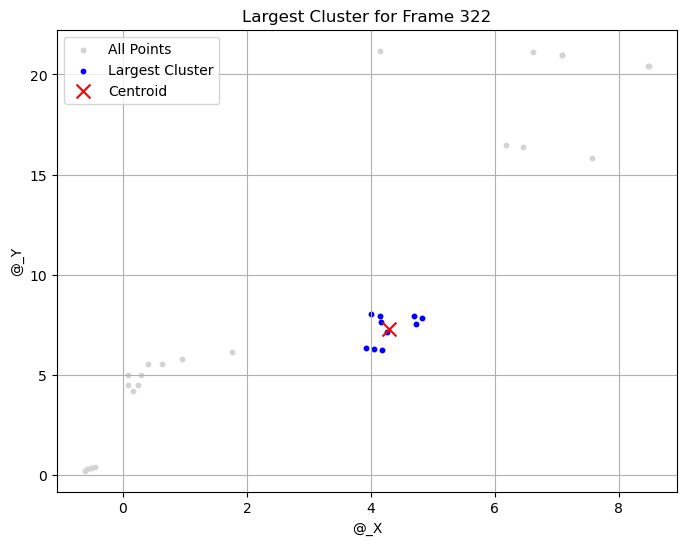

No cluster found for Frame 323. Skipping.


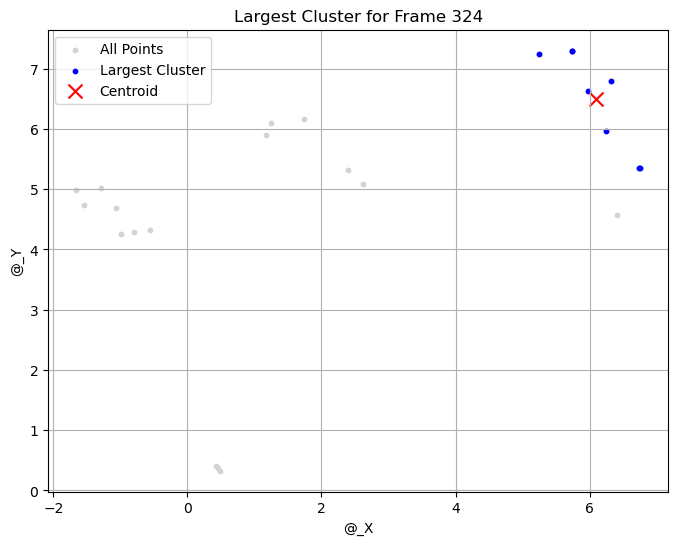

No cluster found for Frame 325. Skipping.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

file_path = 'TREE/#116_cyclic1_UART_Tree_Run1.rec.xlsx'
cloudpoint_data = pd.read_excel(file_path, sheet_name='CloudPoint')
columns_needed = ['@_Frame', '@_X', '@_Y']
filtered_data = cloudpoint_data[columns_needed]
filtered_data = filtered_data[filtered_data['@_Frame'] <= filtered_data['@_Frame'].unique()[8]]

def get_largest_cluster(data, eps=2.0, min_samples=3):
    """
    Uses DBSCAN to find clusters and returns the largest cluster.
    - eps: Maximum distance between two points to be considered neighbors.
    - min_samples: Minimum points required to form a cluster.
    """
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    labels = db.labels_
    
    unique_labels = set(labels) - {-1}
    if not unique_labels:
        return np.array([])  
    
    largest_cluster = max(unique_labels, key=lambda lbl: sum(labels == lbl))
    return data[labels == largest_cluster]

unique_frames = filtered_data['@_Frame'].unique()[:30]  

for frame in unique_frames:
    frame_data = filtered_data[filtered_data['@_Frame'] == frame][['@_X', '@_Y']].dropna().to_numpy()
    
    largest_cluster = get_largest_cluster(frame_data, eps=1.0, min_samples=5)
    
    if largest_cluster.size == 0:
        print(f"No cluster found for Frame {frame}. Skipping.")
        continue
    
    centroid = largest_cluster.mean(axis=0)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(frame_data[:, 0], frame_data[:, 1], color='lightgray', s=10, label="All Points")
    plt.scatter(largest_cluster[:, 0], largest_cluster[:, 1], color='blue', s=10, label="Largest Cluster")
    plt.scatter(centroid[0], centroid[1], color='red', marker='x', s=100, label="Centroid")
    plt.title(f"Largest Cluster for Frame {frame}")
    plt.xlabel("@_X")
    plt.ylabel("@_Y")
    plt.legend()
    plt.grid(True)
    plt.show()


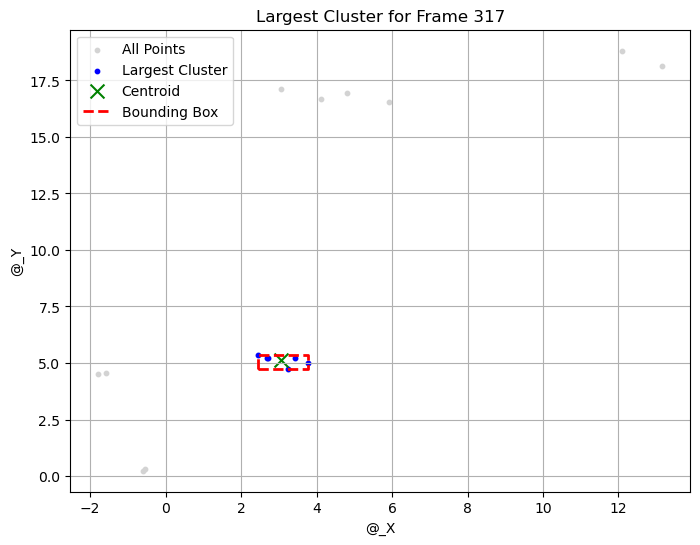

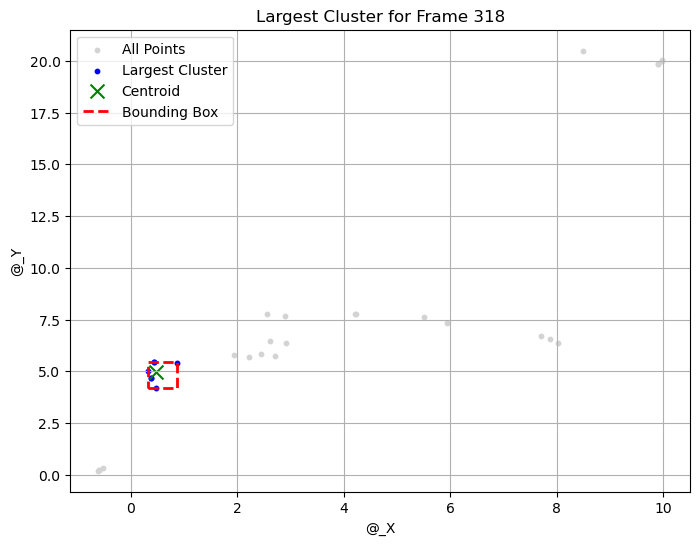

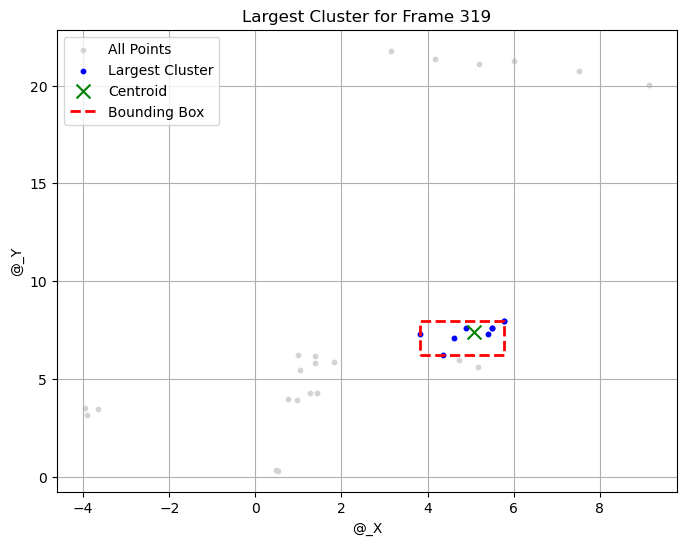

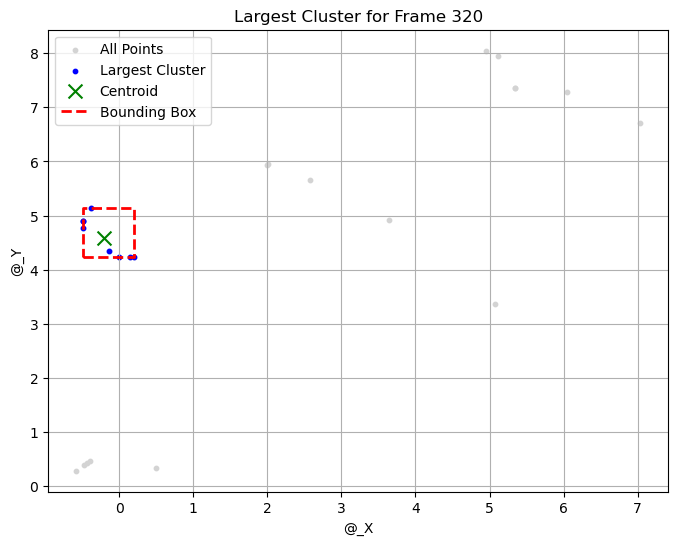

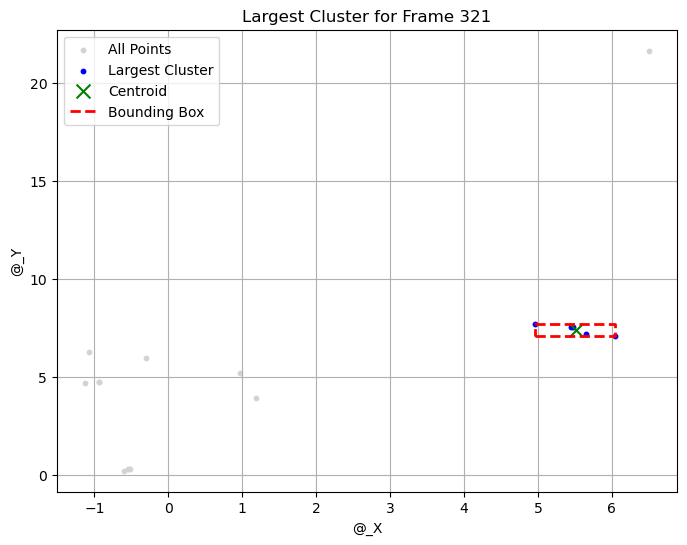

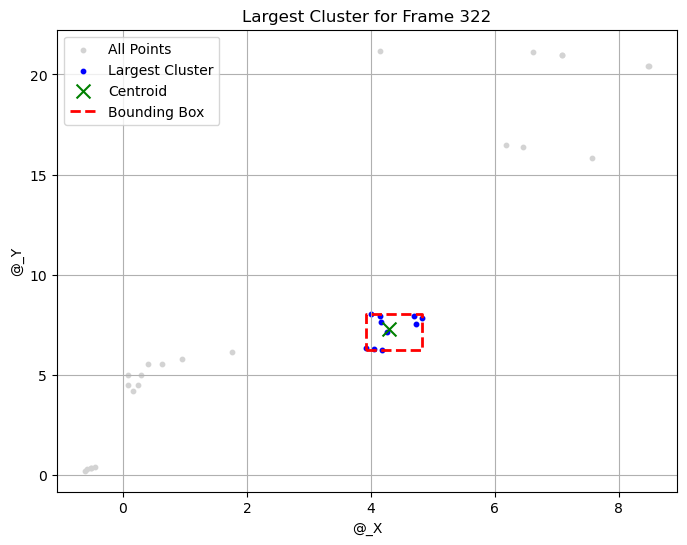

No cluster found for Frame 323. Skipping.


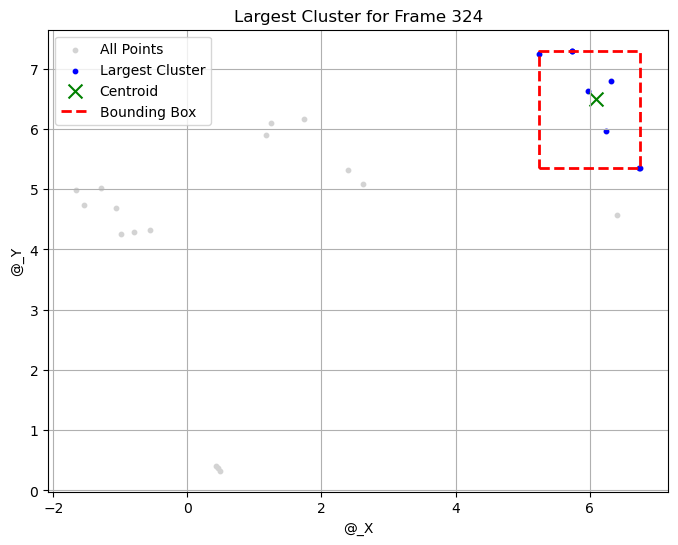

No cluster found for Frame 325. Skipping.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

# File path
file_path = 'TREE/#116_cyclic1_UART_Tree_Run1.rec.xlsx'
cloudpoint_data = pd.read_excel(file_path, sheet_name='CloudPoint')
columns_needed = ['@_Frame', '@_X', '@_Y']
filtered_data = cloudpoint_data[columns_needed]
filtered_data = filtered_data[filtered_data['@_Frame'] <= filtered_data['@_Frame'].unique()[8]]

def get_largest_cluster(data, eps=2.0, min_samples=3):
    """
    Uses DBSCAN to find clusters and returns the largest cluster.
    - eps: Maximum distance between two points to be considered neighbors.
    - min_samples: Minimum points required to form a cluster.
    """
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    labels = db.labels_
    
    unique_labels = set(labels) - {-1}
    if not unique_labels:
        return np.array([])  
    
    largest_cluster = max(unique_labels, key=lambda lbl: sum(labels == lbl))
    return data[labels == largest_cluster]

unique_frames = filtered_data['@_Frame'].unique()[:30]  

for frame in unique_frames:
    frame_data = filtered_data[filtered_data['@_Frame'] == frame][['@_X', '@_Y']].dropna().to_numpy()
    
    largest_cluster = get_largest_cluster(frame_data, eps=1.0, min_samples=5)
    
    if largest_cluster.size == 0:
        print(f"No cluster found for Frame {frame}. Skipping.")
        continue
    
    centroid = largest_cluster.mean(axis=0)
    
    # Calculate bounding box
    x_min, x_max = largest_cluster[:, 0].min(), largest_cluster[:, 0].max()
    y_min, y_max = largest_cluster[:, 1].min(), largest_cluster[:, 1].max()

    plt.figure(figsize=(8, 6))
    plt.scatter(frame_data[:, 0], frame_data[:, 1], color='lightgray', s=10, label="All Points")
    plt.scatter(largest_cluster[:, 0], largest_cluster[:, 1], color='blue', s=10, label="Largest Cluster")
    plt.scatter(centroid[0], centroid[1], color='green', marker='x', s=100, label="Centroid")
    
    # Draw bounding box
    plt.plot(
        [x_min, x_max, x_max, x_min, x_min],
        [y_min, y_min, y_max, y_max, y_min],
        color='red', linestyle='--', linewidth=2, label="Bounding Box"
    )
    
    plt.title(f"Largest Cluster for Frame {frame}")
    plt.xlabel("@_X")
    plt.ylabel("@_Y")
    plt.legend()
    plt.grid(True)
    plt.show()


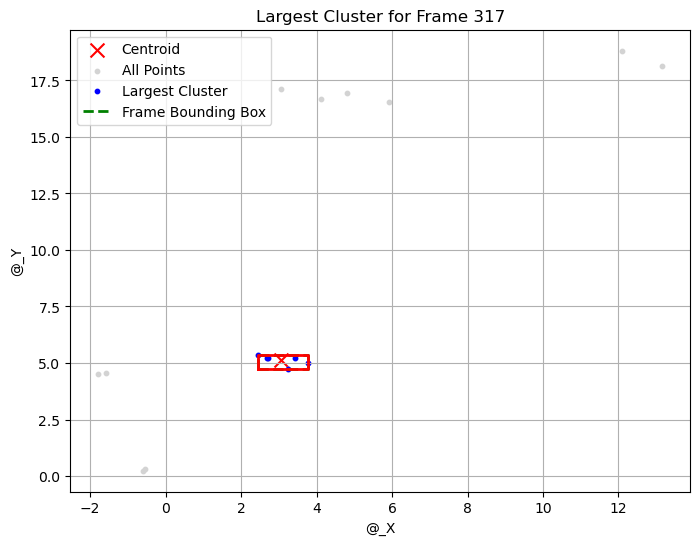

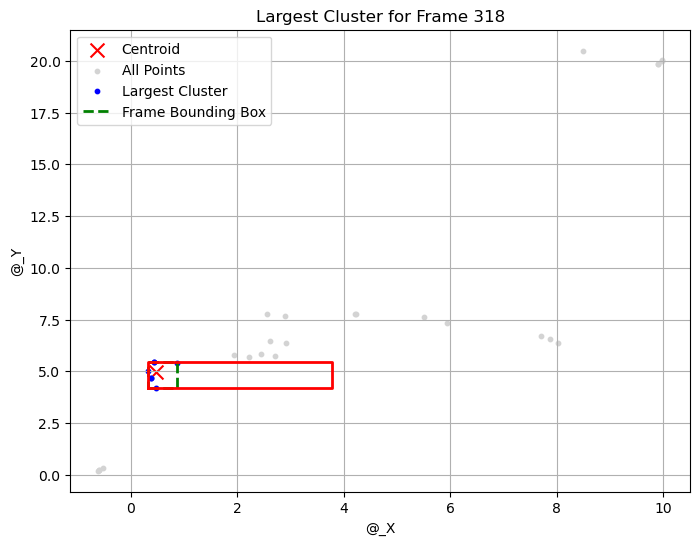

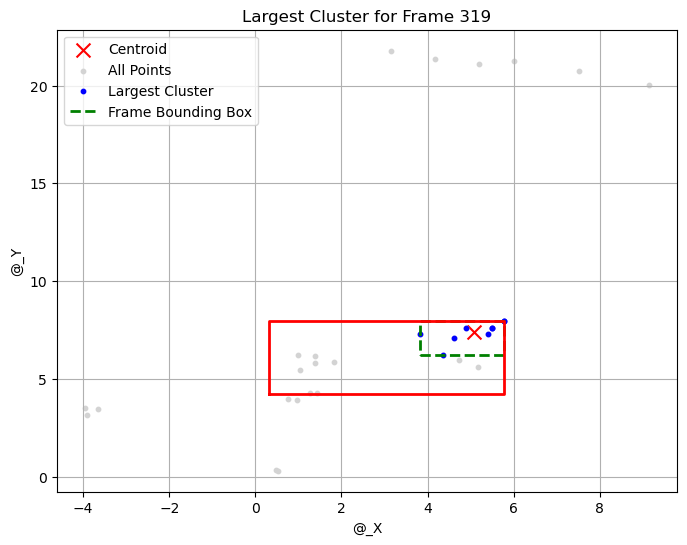

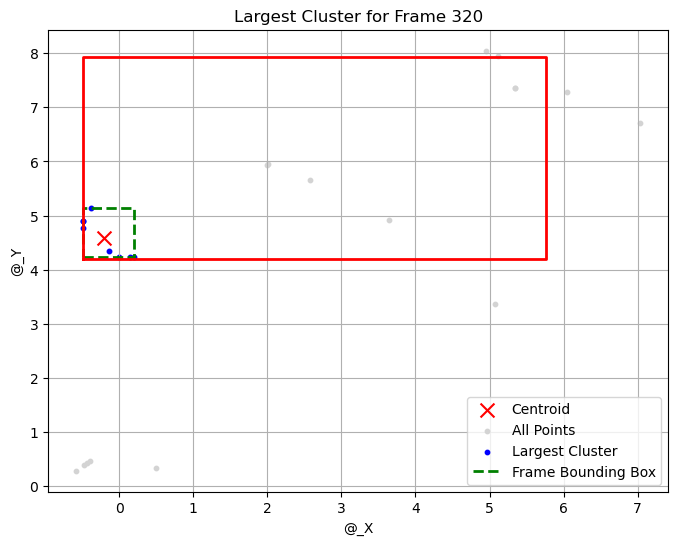

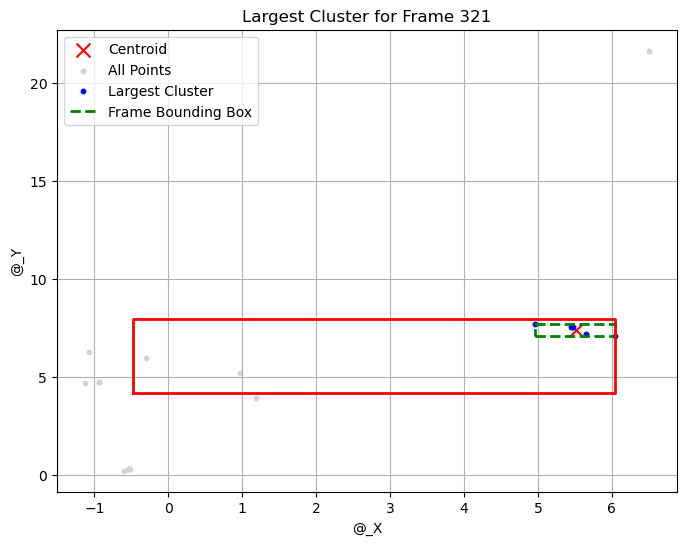

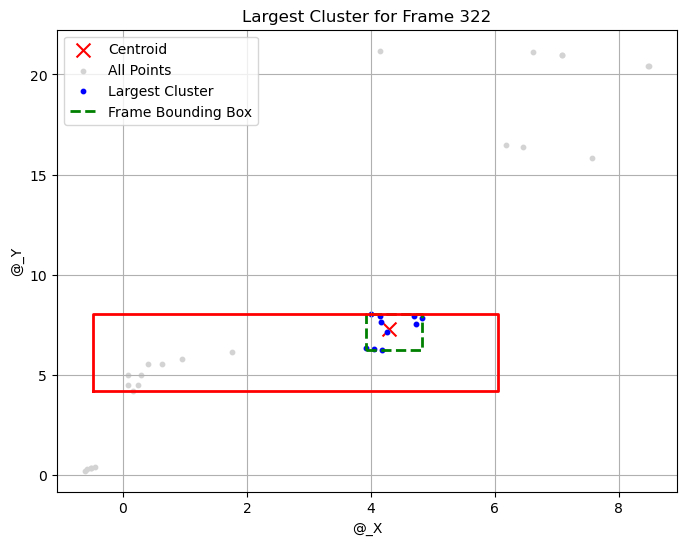

No cluster found for Frame 323. Skipping.


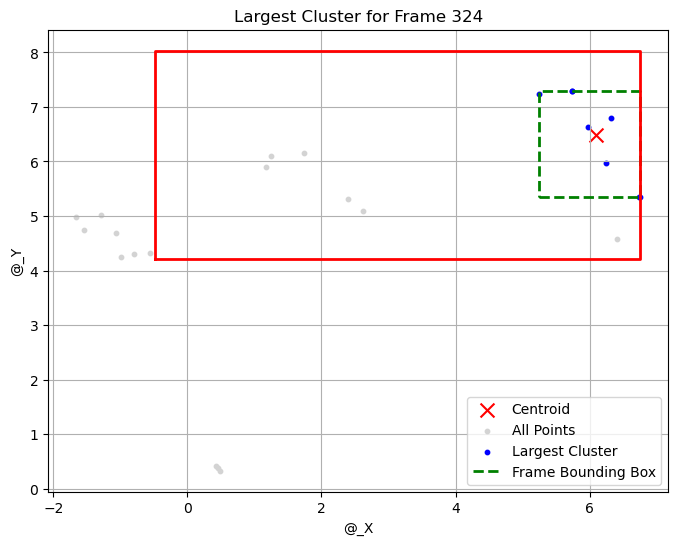

No cluster found for Frame 325. Skipping.
{'Frame': 317, 'x_min': 2.4375, 'x_max': 3.78125, 'y_min': 4.71875, 'y_max': 5.34375}
{'Frame': 318, 'x_min': 0.3125, 'x_max': 0.859375, 'y_min': 4.203125, 'y_max': 5.453125}
{'Frame': 319, 'x_min': 3.828125, 'x_max': 5.765625, 'y_min': 6.21875, 'y_max': 7.9375}
{'Frame': 320, 'x_min': -0.484375, 'x_max': 0.203125, 'y_min': 4.234375, 'y_max': 5.140625}
{'Frame': 321, 'x_min': 4.953125, 'x_max': 6.046875, 'y_min': 7.078125, 'y_max': 7.703125}
{'Frame': 322, 'x_min': 3.921875, 'x_max': 4.828125, 'y_min': 6.234375, 'y_max': 8.03125}
{'Frame': 324, 'x_min': 5.25, 'x_max': 6.75, 'y_min': 5.34375, 'y_max': 7.296875}

Global Bounding Box: x_min=-0.484375, x_max=6.75, y_min=4.203125, y_max=8.03125


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

# File path
file_path = 'TREE/#116_cyclic1_UART_Tree_Run1.rec.xlsx'
cloudpoint_data = pd.read_excel(file_path, sheet_name='CloudPoint')
columns_needed = ['@_Frame', '@_X', '@_Y']
filtered_data = cloudpoint_data[columns_needed]
filtered_data = filtered_data[filtered_data['@_Frame'] <= filtered_data['@_Frame'].unique()[8]]

def get_largest_cluster(data, eps=2.0, min_samples=3):
    """
    Uses DBSCAN to find clusters and returns the largest cluster.
    - eps: Maximum distance between two points to be considered neighbors.
    - min_samples: Minimum points required to form a cluster.
    """
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    labels = db.labels_
    
    unique_labels = set(labels) - {-1}
    if not unique_labels:
        return np.array([])  
    
    largest_cluster = max(unique_labels, key=lambda lbl: sum(labels == lbl))
    return data[labels == largest_cluster]

unique_frames = filtered_data['@_Frame'].unique()[:30]

# Initialize global bounding box
xmin_global, xmax_global = float('inf'), float('-inf')
ymin_global, ymax_global = float('inf'), float('-inf')

# Store per-frame bounding boxes
frame_bounding_boxes = []

for frame in unique_frames:
    frame_data = filtered_data[filtered_data['@_Frame'] == frame][['@_X', '@_Y']].dropna().to_numpy()
    
    largest_cluster = get_largest_cluster(frame_data, eps=1.0, min_samples=5)
    
    if largest_cluster.size == 0:
        print(f"No cluster found for Frame {frame}. Skipping.")
        continue
        
    centroid = largest_cluster.mean(axis=0)
    
    # Calculate bounding box for the current frame
    x_min, x_max = largest_cluster[:, 0].min(), largest_cluster[:, 0].max()
    y_min, y_max = largest_cluster[:, 1].min(), largest_cluster[:, 1].max()
    
    # Update global bounding box
    xmin_global = min(xmin_global, x_min)
    xmax_global = max(xmax_global, x_max)
    ymin_global = min(ymin_global, y_min)
    ymax_global = max(ymax_global, y_max)
    
    # Save the frame bounding box
    frame_bounding_boxes.append({
        'Frame': frame,
        'x_min': x_min,
        'x_max': x_max,
        'y_min': y_min,
        'y_max': y_max
    })

    # Plot the current frame
    plt.figure(figsize=(8, 6))
    plt.scatter(centroid[0], centroid[1], color='red', marker='x', s=100, label="Centroid")
    plt.scatter(frame_data[:, 0], frame_data[:, 1], color='lightgray', s=10, label="All Points")
    plt.scatter(largest_cluster[:, 0], largest_cluster[:, 1], color='blue', s=10, label="Largest Cluster")
    
    # Draw bounding box for the current frame
    plt.plot(
        [x_min, x_max, x_max, x_min, x_min],
        [y_min, y_min, y_max, y_max, y_min],
        color='green', linestyle='--', linewidth=2, label="Frame Bounding Box"
    )
    
    plt.title(f"Largest Cluster for Frame {frame}")
    plt.xlabel("@_X")
    plt.ylabel("@_Y")
    plt.legend()
    plt.grid(True)
    plt.plot(
    [xmin_global, xmax_global, xmax_global, xmin_global, xmin_global],
    [ymin_global, ymin_global, ymax_global, ymax_global, ymin_global],
    color='red', linestyle='-', linewidth=2, label="Global Bounding Box"
)
    plt.show()


for bbox in frame_bounding_boxes:
    print(bbox)

print(f"\nGlobal Bounding Box: x_min={xmin_global}, x_max={xmax_global}, y_min={ymin_global}, y_max={ymax_global}")


No cluster found for Frame 1099. Skipping.
No cluster found for Frame 1101. Skipping.
No cluster found for Frame 1103. Skipping.
No cluster found for Frame 1106. Skipping.
No cluster found for Frame 1129. Skipping.
No cluster found for Frame 1139. Skipping.
No cluster found for Frame 1140. Skipping.
No cluster found for Frame 1142. Skipping.
No cluster found for Frame 1155. Skipping.
No cluster found for Frame 1156. Skipping.


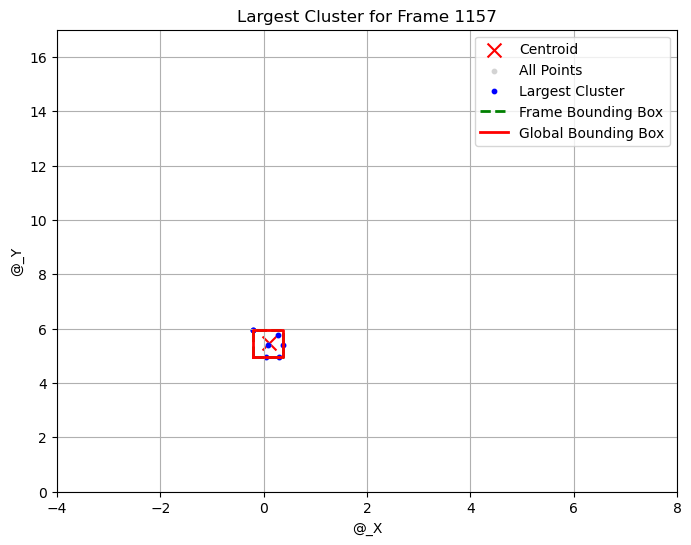

No cluster found for Frame 1163. Skipping.
No cluster found for Frame 1166. Skipping.
No cluster found for Frame 1170. Skipping.
No cluster found for Frame 1172. Skipping.
No cluster found for Frame 1173. Skipping.
No cluster found for Frame 1174. Skipping.
No cluster found for Frame 1179. Skipping.
No cluster found for Frame 1183. Skipping.
No cluster found for Frame 1188. Skipping.
No cluster found for Frame 1219. Skipping.
No cluster found for Frame 1291. Skipping.
No cluster found for Frame 1309. Skipping.
No cluster found for Frame 1313. Skipping.
No cluster found for Frame 1315. Skipping.
No cluster found for Frame 1318. Skipping.
No cluster found for Frame 1319. Skipping.
No cluster found for Frame 1321. Skipping.
No cluster found for Frame 1407. Skipping.
No cluster found for Frame 1430. Skipping.
No cluster found for Frame 1431. Skipping.
No cluster found for Frame 1432. Skipping.
No cluster found for Frame 1433. Skipping.
No cluster found for Frame 1435. Skipping.
No cluster 

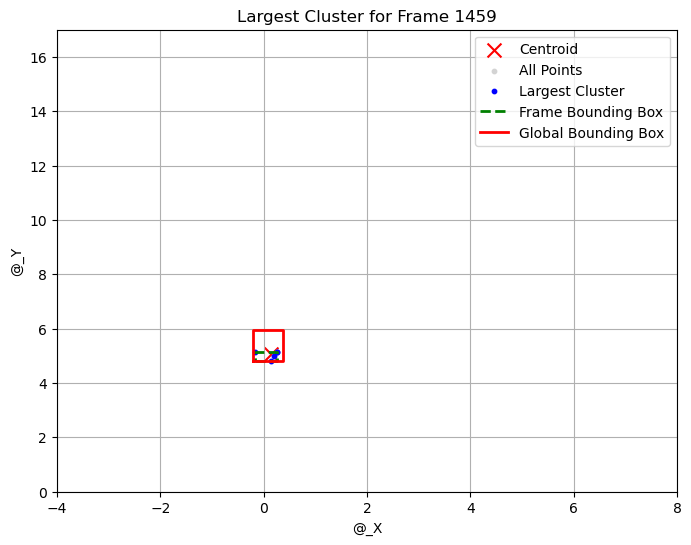

No cluster found for Frame 1460. Skipping.
No cluster found for Frame 1461. Skipping.
No cluster found for Frame 1462. Skipping.
No cluster found for Frame 1463. Skipping.
No cluster found for Frame 1464. Skipping.
No cluster found for Frame 1467. Skipping.
No cluster found for Frame 1468. Skipping.
No cluster found for Frame 1469. Skipping.


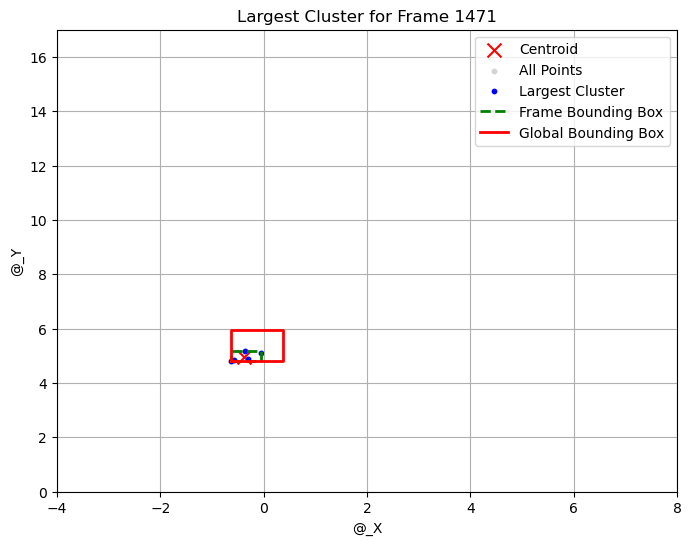

No cluster found for Frame 1472. Skipping.
No cluster found for Frame 1473. Skipping.
No cluster found for Frame 1475. Skipping.
No cluster found for Frame 1477. Skipping.
No cluster found for Frame 1478. Skipping.
No cluster found for Frame 1480. Skipping.
No cluster found for Frame 1482. Skipping.
No cluster found for Frame 1483. Skipping.
No cluster found for Frame 1484. Skipping.
No cluster found for Frame 1485. Skipping.
No cluster found for Frame 1490. Skipping.
No cluster found for Frame 1491. Skipping.
No cluster found for Frame 1492. Skipping.
No cluster found for Frame 1494. Skipping.
No cluster found for Frame 1496. Skipping.
No cluster found for Frame 1506. Skipping.
No cluster found for Frame 1507. Skipping.
No cluster found for Frame 1513. Skipping.
No cluster found for Frame 1530. Skipping.
No cluster found for Frame 1542. Skipping.
No cluster found for Frame 1608. Skipping.
No cluster found for Frame 1618. Skipping.
No cluster found for Frame 1626. Skipping.
No cluster 

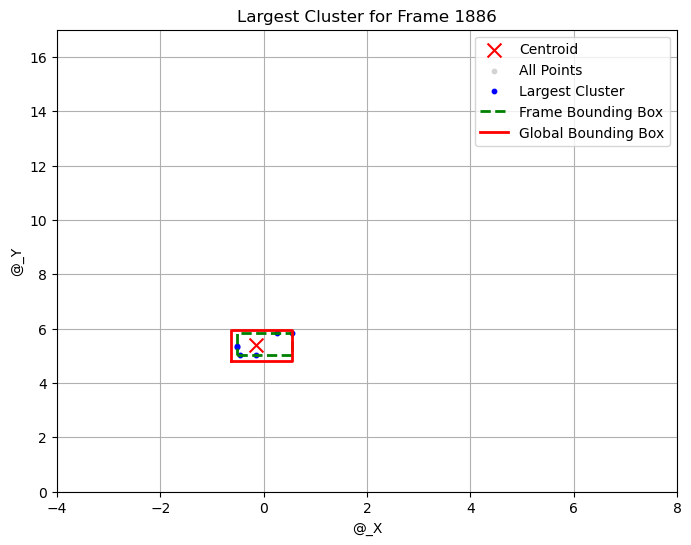

No cluster found for Frame 1887. Skipping.
No cluster found for Frame 1888. Skipping.
No cluster found for Frame 1890. Skipping.
No cluster found for Frame 1892. Skipping.


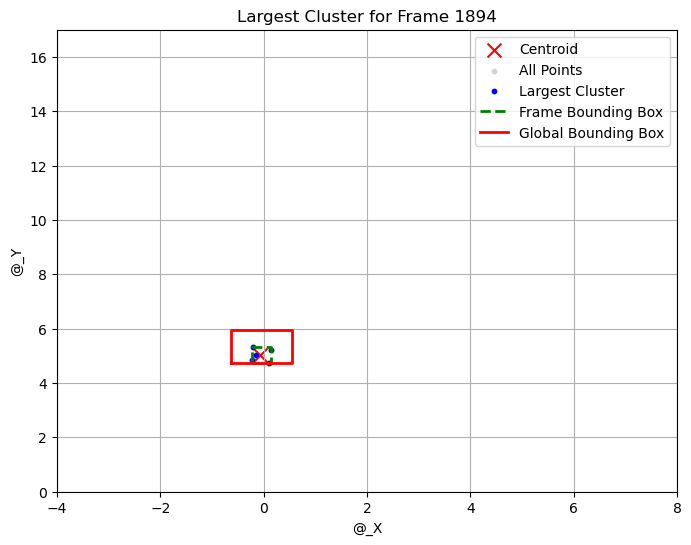

No cluster found for Frame 1899. Skipping.
No cluster found for Frame 1905. Skipping.
No cluster found for Frame 1907. Skipping.
No cluster found for Frame 1908. Skipping.
No cluster found for Frame 1909. Skipping.
No cluster found for Frame 1911. Skipping.
No cluster found for Frame 1913. Skipping.
No cluster found for Frame 1914. Skipping.
No cluster found for Frame 1919. Skipping.
No cluster found for Frame 1922. Skipping.
No cluster found for Frame 1924. Skipping.
No cluster found for Frame 1925. Skipping.
No cluster found for Frame 1926. Skipping.
No cluster found for Frame 1927. Skipping.
No cluster found for Frame 1929. Skipping.
No cluster found for Frame 1932. Skipping.


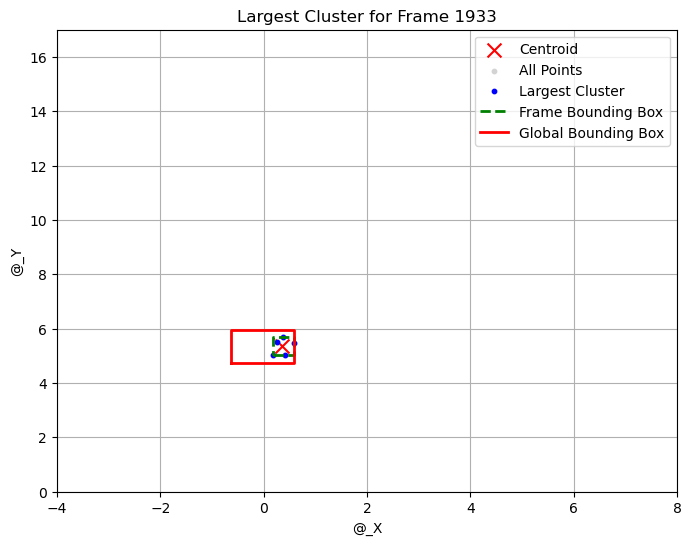

No cluster found for Frame 1934. Skipping.
No cluster found for Frame 1936. Skipping.
No cluster found for Frame 1938. Skipping.
No cluster found for Frame 1940. Skipping.
No cluster found for Frame 1941. Skipping.
No cluster found for Frame 1943. Skipping.
No cluster found for Frame 1944. Skipping.
No cluster found for Frame 1946. Skipping.
No cluster found for Frame 1947. Skipping.
No cluster found for Frame 1949. Skipping.
No cluster found for Frame 1951. Skipping.
No cluster found for Frame 1952. Skipping.
No cluster found for Frame 1958. Skipping.
No cluster found for Frame 1961. Skipping.
No cluster found for Frame 1962. Skipping.
No cluster found for Frame 1966. Skipping.
No cluster found for Frame 1967. Skipping.
No cluster found for Frame 1974. Skipping.
No cluster found for Frame 1975. Skipping.
No cluster found for Frame 1976. Skipping.
No cluster found for Frame 1977. Skipping.
No cluster found for Frame 1979. Skipping.


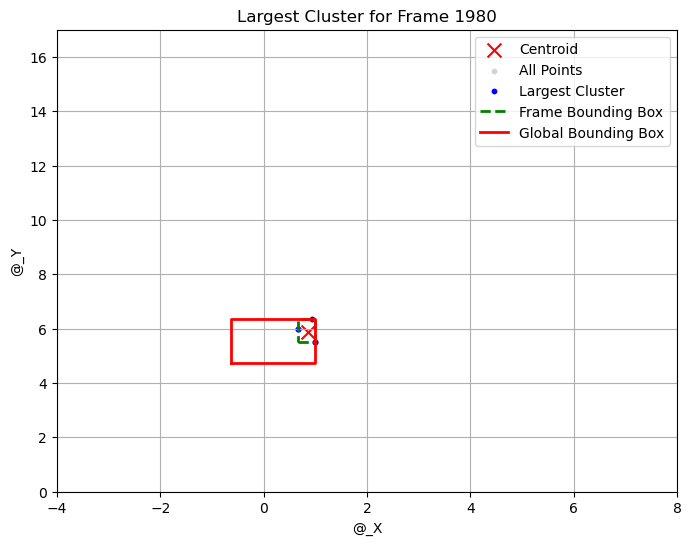

No cluster found for Frame 1983. Skipping.
No cluster found for Frame 1984. Skipping.
No cluster found for Frame 1985. Skipping.
No cluster found for Frame 1987. Skipping.
No cluster found for Frame 1988. Skipping.
No cluster found for Frame 1989. Skipping.
No cluster found for Frame 1991. Skipping.
No cluster found for Frame 1994. Skipping.
No cluster found for Frame 1995. Skipping.
No cluster found for Frame 1996. Skipping.
No cluster found for Frame 1997. Skipping.
No cluster found for Frame 2000. Skipping.
No cluster found for Frame 2001. Skipping.
No cluster found for Frame 2002. Skipping.
No cluster found for Frame 2003. Skipping.
No cluster found for Frame 2004. Skipping.
No cluster found for Frame 2006. Skipping.
No cluster found for Frame 2007. Skipping.
No cluster found for Frame 2008. Skipping.
No cluster found for Frame 2010. Skipping.
No cluster found for Frame 2012. Skipping.
No cluster found for Frame 2014. Skipping.
No cluster found for Frame 2015. Skipping.
No cluster 

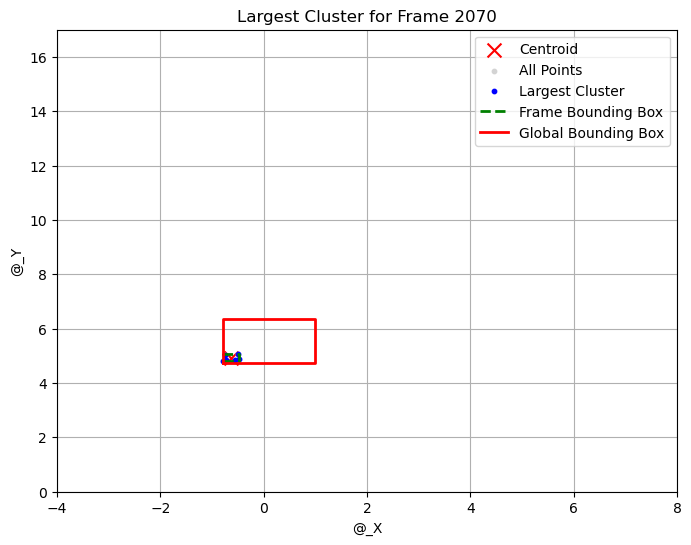

No cluster found for Frame 2072. Skipping.
No cluster found for Frame 2084. Skipping.
No cluster found for Frame 2087. Skipping.

Global Bounding Box: x_min=-0.78125, x_max=0.984375, y_min=4.734375, y_max=6.34375


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

file_path = 'TREE/#116_cyclic1_UART_Tree_Run4.rec.xlsx'
cloudpoint_data = pd.read_excel(file_path, sheet_name='CloudPoint')
cloudpoint_data = cloudpoint_data[cloudpoint_data['@_SNR'] > 25]
columns_needed = ['@_Frame', '@_X', '@_Y']
filtered_data = cloudpoint_data[columns_needed]
# filtered_data = filtered_data[filtered_data['@_Frame'] <= filtered_data['@_Frame'].unique()[120]]
filtered_data = filtered_data[filtered_data['@_Frame'].isin(filtered_data['@_Frame'].unique())]


def get_largest_cluster(data, eps=2.0, min_samples=3):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    labels = db.labels_
    
    unique_labels = set(labels) - {-1}
    if not unique_labels:
        return np.array([])  
    
    largest_cluster = max(unique_labels, key=lambda lbl: sum(labels == lbl))
    return data[labels == largest_cluster]

unique_frames = filtered_data['@_Frame'].unique()

xmin_global, xmax_global = float('inf'), float('-inf')
ymin_global, ymax_global = float('inf'), float('-inf')
previous_centroid = None

frame_bounding_boxes = []

for frame in unique_frames:
    frame_data = filtered_data[filtered_data['@_Frame'] == frame][['@_X', '@_Y']].dropna().to_numpy()
    
    largest_cluster = get_largest_cluster(frame_data, eps=1.0, min_samples=5)
    
    if largest_cluster.size == 0:
        print(f"No cluster found for Frame {frame}. Skipping.")
        continue

    centroid = largest_cluster.mean(axis=0)
    
    x_min, x_max = largest_cluster[:, 0].min(), largest_cluster[:, 0].max()
    y_min, y_max = largest_cluster[:, 1].min(), largest_cluster[:, 1].max()
    

    if previous_centroid is None or abs(centroid[1] - previous_centroid[1]) < 2:
        xmin_global = min(xmin_global, x_min)
        xmax_global = max(xmax_global, x_max)
        ymin_global = min(ymin_global, y_min)
        ymax_global = max(ymax_global, y_max)

        previous_centroid = centroid

        frame_bounding_boxes.append({
            'Frame': frame,
            'x_min': x_min,
            'x_max': x_max,
            'y_min': y_min,
            'y_max': y_max,
            'centroid_x': centroid[0],
            'centroid_y': centroid[1],
        })

    plt.figure(figsize=(8, 6))
    plt.scatter(centroid[0], centroid[1], color='red', marker='x', s=100, label="Centroid")
    plt.scatter(frame_data[:, 0], frame_data[:, 1], color='lightgray', s=10, label="All Points")
    plt.scatter(largest_cluster[:, 0], largest_cluster[:, 1], color='blue', s=10, label="Largest Cluster")
    
    plt.plot(
        [x_min, x_max, x_max, x_min, x_min],
        [y_min, y_min, y_max, y_max, y_min],
        color='green', linestyle='--', linewidth=2, label="Frame Bounding Box"
    )
    
    plt.plot(
        [xmin_global, xmax_global, xmax_global, xmin_global, xmin_global],
        [ymin_global, ymin_global, ymax_global, ymax_global, ymin_global],
        color='red', linestyle='-', linewidth=2, label="Global Bounding Box"
    )
    
    plt.title(f"Largest Cluster for Frame {frame}")
    plt.xlabel("@_X")
    plt.ylabel("@_Y")
    plt.xlim((-4, 8))
    plt.ylim((0, 17))
    plt.legend()
    plt.grid(True)
    plt.show()

# for bbox in frame_bounding_boxes:
#     print(bbox)

print(f"\nGlobal Bounding Box: x_min={xmin_global}, x_max={xmax_global}, y_min={ymin_global}, y_max={ymax_global}")


false alarm rate is : 10.03 % , reduce to 9.46 %


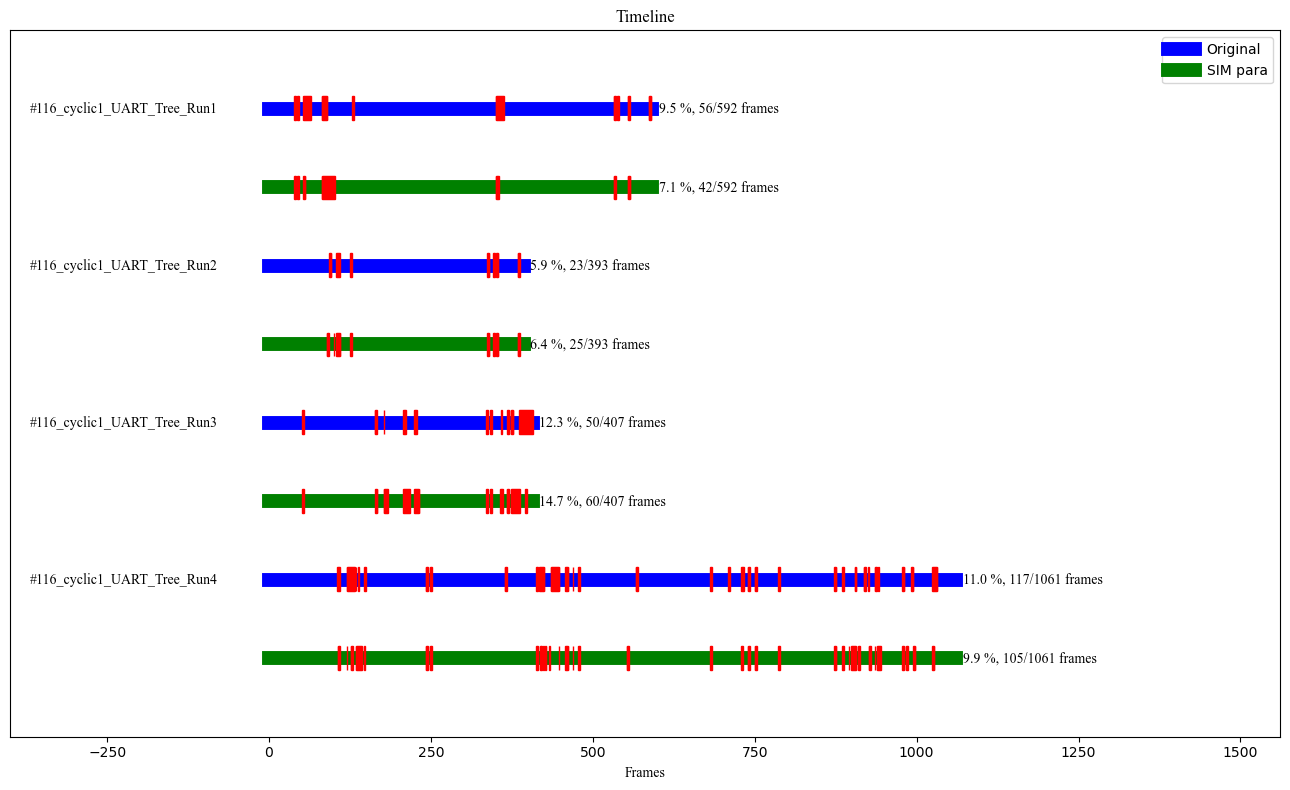

In [4]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

path = 'D:/OneDrive/umec/project/20230901-Tmp_Assignment/20241120-mason_multinoise/20241203/orig/*.xlsx'
xlsx_files = glob.glob(f'{path}')

data_list = []
fig, ax = plt.subplots(figsize=(13, len(xlsx_files) * 2))  # Adjusted figure size for better spacing
max_frame_tmp = 0
SIM_ff = 0
total_frame = 0
orig_ff = 0

xlsx_files = glob.glob(path)
for index, xlsx_file in enumerate(xlsx_files):
    xlsx_SIM = xlsx_file.replace("orig", "cave")
    index_c = 2 * index
    
    # Read the data from Excel files
    data = pd.read_excel(xlsx_file, sheet_name='TrackedTarget', engine="openpyxl")
    data_SIM = pd.read_excel(xlsx_SIM, sheet_name='TrackedTarget', engine="openpyxl")
    data.rename(columns={'@_Frame': 'FrameNo'}, inplace=True)
    data_SIM.rename(columns={'@_Frame': 'FrameNo'}, inplace=True)
    data_pc = pd.read_excel(xlsx_file, sheet_name='CloudPoint', engine="openpyxl")
    
    file_name = os.path.basename(xlsx_file).split(".")[0]
    end_frame = data_pc['@_Frame'].max()
    start_from = data_pc['@_Frame'].min()
    each_frame = end_frame - start_from + 1

    fa_location = pd.DataFrame(columns=['FrameNo', 'Result', 'orig_result'])

    # Gather the results for each frame
    for frame in range(start_from, end_frame + 1):
        result = 1 if (data_SIM[data_SIM['FrameNo'] == frame]['@_Stat'] == 3).any() else 0
        orig_result = 1 if (data[data['FrameNo'] == frame]['@_Stat'] == 3).any() else 0
        fa_location = fa_location._append({'FrameNo': frame, 'Result': result, 'orig_result': orig_result}, ignore_index=True)    

    # Update maximum frame count
    if max_frame_tmp < each_frame:
        max_frame_tmp = each_frame

    avg = sum(fa_location['Result']) / each_frame * 100
    ff_point = sum(fa_location['Result'])
    orig_avg = sum(fa_location['orig_result']) / each_frame * 100
    orig_ff_point = sum(fa_location['orig_result'])

    # Plot original results using rectangles for better proportionality
    ax.plot([0, each_frame], [-index_c, -index_c], color='blue', linewidth=10, label='Original' if index == 0 else "", zorder = 1)
    for ind, ff in enumerate(fa_location['orig_result']):
        if ff == 1:
            rect = Rectangle((ind, -index_c - 0.14), 1, 0.3, color='red', zorder = 2)
            ax.add_patch(rect)

    # Plot decision tree results using rectangles
    ax.plot([0, each_frame], [-index_c-1, -index_c-1], color='green', linewidth=10, label='SIM para' if index == 0 else "", zorder = 1)
    for ind, ff in enumerate(fa_location['Result']):
        if ff == 1:
            rect = Rectangle((ind, -index_c - 1.15), 1, 0.3, color='red', zorder = 2)
            ax.add_patch(rect)

    # Add file name and statistics
    ax.text(-370, -index_c, file_name, verticalalignment='center', font='Times New Roman')
    ax.text(each_frame + 10, -index_c, f'{orig_avg:.1f} %, {orig_ff_point}/{each_frame} frames', verticalalignment='center', font='Times New Roman')
    ax.text(each_frame + 10, -index_c-1, f'{avg:.1f} %, {ff_point}/{each_frame} frames', verticalalignment='center', font='Times New Roman')

    total_frame += each_frame
    orig_ff += orig_ff_point
    SIM_ff += ff_point
    
print(f"false alarm rate is : {orig_ff / total_frame * 100:.2f} % , reduce to {SIM_ff / total_frame * 100:.2f} %")

ax.set_xlim(-400, max_frame_tmp + 500)
ax.set_ylim(-len(xlsx_files) * 2, 1)
ax.set_yticks([])
ax.set_title("Timeline", fontname='Times New Roman')
ax.set_xlabel("Frames", fontname='Times New Roman')
ax.legend()
ax.set_aspect(aspect='auto')
plt.tight_layout()  # Adjust layout for better fit
# plt.savefig('original_aac3.svg', format='svg')
plt.show()
